## DSC 540: Week 9&10 Exercises

## Activity 9

In [1]:
## Loading libraries
import urllib.request, urllib.parse, urllib.error

import requests

from bs4 import BeautifulSoup

import ssl

import re

In [2]:
## Check SSl certificate
## Ignore SSL certificate errors

ctx = ssl.create_default_context()

ctx.check_hostname = False

ctx.verify_mode = ssl.CERT_NONE

In [6]:
# Read HTML from the URL and pass on to BeautifulSoup

top100url = 'https://www.gutenberg.org/browse/scores/top'

response = requests.get(top100url)

In [7]:
## Check the status of the web request
def status_check(r):
    if r.status_code==200:
        print('Success!')
        return 1
    else:
        print('Failed!')
        return -1

In [8]:
## check status response
status_check(response)


Success!


1

In [9]:
## Decode response and pass to beautifulsoup

contents = response.content.decode(response.encoding)

soup = BeautifulSoup(contents, 'html.parser')

In [10]:
## find all link tags (href)
# Empty list to hold all the http links in the HTML page

lst_links=[]

# Find all the href tags and store them in the list of links

for link in soup.find_all('a'):
    lst_links.append(link.get('href'))
## print all the links
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [11]:
## finding numeric digits in the links
booknum=[]
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
# Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer

        booknum.append(int(n[0]))

## Printing the file numbers
print ('\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n'+'-'*70)

## print the numbers
print(booknum)




The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1342, 68137, 11, 84, 1661, 68134, 20228, 2701, 345, 98, 174, 64317, 4300, 68133, 1952, 32449, 43, 2600, 1400, 68135, 1260, 1080, 35899, 1184, 2554, 1232, 2591, 30254, 2542, 47629, 5740, 76, 45, 5200, 74, 6130, 219, 844, 46, 514, 120, 55, 158, 1727, 135, 28054, 27827, 10623, 2852, 58585, 68140, 2814, 25344, 1497, 996, 4363, 35, 16, 766, 68136, 730, 768, 67098, 10676, 205, 1399, 244, 1998, 63256, 36, 10, 3600, 2500, 236, 4980, 203, 68141, 2680, 3206, 2148, 68122, 829, 24518, 600, 8800, 3207]


In [12]:
## What does the soup object's text look like
print(soup.text[:2000])

if (top != self):
    top.location.replace("http://www.gutenberg.org")
    alert('Project Gutenberg is a FREE service with NO membership required. If you paid somebody else to get here,make them give you your money back!')






Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-05-21134032
last 7 days1067660
last 30 days4882328



Top 100 EBooks yesterd

NameError: name 'top' is not defined

In [13]:
## Search in the extracted text
# Temp empty list of Ebook names

lst_titles_temp=[]
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+9+i])

lst_titles=[]

for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

for l in lst_titles:
    print(l)


Pride and Prejudice by Jane Austen 
The cake and biscuit book by Elizabeth Douglas 
Alice
Frankenstein
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The book of Earth by Alfred Noyes 
Noli Me Tangere by Jos
Moby Dick
Dracula by Bram Stoker 
A Tale of Two Cities by Charles Dickens 
The Picture of Dorian Gray by Oscar Wilde 
The Great Gatsby by F
Ulysses by James Joyce 
The history of the proceedings in the case of Margaret
The Yellow Wallpaper by Charlotte Perkins Gilman 
Japanese Girls and Women by Alice Mabel Bacon 
The Strange Case of Dr
War and Peace by graf Leo Tolstoy 
Great Expectations by Charles Dickens 
Flower o
Jane Eyre
A Modest Proposal by Jonathan Swift 
The Philippines a Century Hence by Jos
The Count of Monte Cristo
Crime and Punishment by Fyodor Dostoyevsky 
The Prince by Niccol
Grimms
The Romance of Lust
A Doll
Ang 
Tractatus Logico
Adventures of Huckleberry Finn by Mark Twain 
Anne of Green Gables by L
Metamorphosis by Franz Kafka 
The Adventures of Tom Sa

## Activity 10

In [15]:
## import modules
import urllib.request, urllib.parse, urllib.error

import json

In [17]:
with open('APIkey.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [18]:
## assigning the url
serviceurl = 'http://www.omdbapi.com/?'

In [19]:
## creating a variable called apikey
apikey = '&apikey='+omdbapi

In [20]:

#7: Writing a utility function called print_json to print the movie data from a JSON file

def print_json(json_file):
    #List of the categories in the JSON files returned by the OMDb API
    json_categories = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 
                 'Language', 'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    
    #Iterating over the list to print each category followed by its value from the JSON file
    for k in json_categories:
        print(f'{k} : {json_file[k]}')

In [21]:
import os

#Function to download the poster
def download_poster(json_file):
    #Pulling the movie title and poster link from the JSON file
    title = str(json_file['Title'])
    poster_link = json_file['Poster']
    
    #Reading the poster image data by passing the poster link through the urllib.request library
    poster = UR.urlopen(poster_link).read()
    
    #Defining the image file's save location in the current working directory
    save_location = os.getcwd() + '\\'
    
    #Getting the file extension from the poster URL by grabbing the last value from the URL split by its dots
    #Usually images will end in '.JPEG' or '.PNG' so the last set of characters after the last dot should be the extension.
    poster_file_extension = poster_link.split('.')[-1]
    
    #If the file extension is one of the most common image extensions, the file will be downloaded
    if poster_file_extension.upper() == 'JPEG' or poster_file_extension.upper() == 'JPG' or poster_file_extension.upper() == 'PNG':
        #Defining what the saved file will be named
        filename = '{}{}{}{}'.format(save_location, title, '.', poster_file_extension)

        #Opening a brand new file, writing the image data to it, then closing it
        with open(filename,'wb') as f:
            f.write(poster)
            f.close()

In [22]:
## utility function for searching
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of {title} now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie

        if json_data['Poster']!='N/A':
            save_poster(json_data)
        else:
            print('Error encountered: ',json_data['Error'])

    except urllib.error.URLError as e:
        print(f'ERROR: {e.reason}')

In [23]:
#Writing a function to display the downloaded poster directly in Jupyter Notebook.

def show_image(movie_name):
    try:
        from IPython.display import Image, display
        display(Image(filename = '{}.jpg'.format(movie_name)))
    except:
        print('ERROR!')

In [24]:

#Testing the functions on the movie Titanic
titanic = 'Titanic'
search_movie(titanic)
show_image(titanic)
print(' ')

#Testing to see if an error occurs
#search_movie('No Movie Found')
show_image('No Movie Found')

Retrieving the data of Titanic now... 
http://www.omdbapi.com/?t=Titanic&apikey=1cba7e68
Title : Titanic
Year : 1997
Rated : PG-13
Released : 19 Dec 1997
Runtime : 194 min
Genre : Drama, Romance
Director : James Cameron
Writer : James Cameron
Actors : Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot : A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language : English, Swedish, Italian, French
Country : United States, Mexico
Awards : Won 11 Oscars. 125 wins & 83 nominations total
Ratings : [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore : 75
imdbRating : 7.9
imdbVotes : 1,131,404
imdbID : tt0120338


NameError: name 'save_poster' is not defined

In [27]:
# Import the Twython class
from twython import Twython
import json

# Load credentials from json file
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)

# Instantiate an object
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])

# Create our query
query1 = {'q': 'Bellevue University',
        'result_type': 'recent',
         'count': '100',
        'lang': 'en',
        }
query2 = {'q': 'Data Science',
        'result_type': 'recent',
         'count': '100',
        'lang': 'en',
        }

In [28]:
import pandas as pd

# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}
for status in python_tweets.search(**query1)['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])

# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)
df.sort_values(by='favorite_count', inplace=True, ascending=False)
df

,user,date,text,favorite_count
30,MarcusClapp,Thu May 19 17:19:46 +0000 2022,🚨Commitment Alert 🚨 \n\nCongrats to Hawks O...,60
40,DawgsAcademy,Wed May 18 18:00:29 +0000 2022,"Logan Grant, recent Bellevue University commit...",26
38,GHSCouns,Wed May 18 18:13:13 +0000 2022,Off to Bellevue University! @GHS_Principal1 ht...,19
25,KLEMSports,Thu May 19 17:36:04 +0000 2022,Le Mars alum Keaton Candor is doing his best t...,14
14,OWHsports,Thu May 19 23:03:25 +0000 2022,Bellevue won a winner-take-all game from Conco...,14
52,nefury00,Mon May 16 23:54:17 +0000 2022,The list is growing and not many spots left. U...,14
15,OWHnews,Thu May 19 23:03:24 +0000 2022,Bellevue won a winner-take-all game from Conco...,5
57,hoops4health33,Sun May 15 02:00:14 +0000 2022,Great game in a battle to the wire against Fun...,5
41,Natashajeneeee,Wed May 18 04:08:49 +0000 2022,Bellevue University B.S. Healthcare Management...,4
1,Bellevue_Times,Sun May 22 19:05:30 +0000 2022,Among the graduates will be student speaker As...,4


In [29]:
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}
for status in python_tweets.search(**query2)['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['favorite_count'].append(status['favorite_count'])

# Structure data in a pandas DataFrame for easier manipulation
df1 = pd.DataFrame(dict_)
df1.sort_values(by='favorite_count', inplace=True, ascending=False)
df1

,user,date,text,favorite_count
52,science_latte,Mon May 23 03:06:40 +0000 2022,"BTW, ditching authorship on my Ph.D. paper aft...",7
41,TDataScience,Mon May 23 03:10:01 +0000 2022,Why Software Development Skills are Essential ...,7
76,ArxivData,Mon May 23 02:55:21 +0000 2022,"""#300 Building a data science startup (panel)""...",5
89,Deerah1234,Mon May 23 02:49:54 +0000 2022,"@ykdojo I'm passionate about AI, ML, Automatio...",4
68,welovecoders,Mon May 23 02:58:47 +0000 2022,Five FREE Books from which you can learn Pytho...,4
...,...,...,...,...
32,dun_vik,Mon May 23 03:13:13 +0000 2022,One of their first partners is NTT DATA Busine...,0
31,HenryJamesOG,Mon May 23 03:13:42 +0000 2022,RT @0xbnomial: Free machine learning course fr...,0
30,AnaReyn32873262,Mon May 23 03:13:47 +0000 2022,RT @welovecoders: Five FREE Books from which y...,0
28,esMktDigital,Mon May 23 03:14:23 +0000 2022,Why Software Development Skills are Essential ...,0


## Exercise 4

In [30]:
## load packages
import pandas as pd
import seaborn as sns

In [31]:
## import data and apply cleansing rules
carPriceData = pd.read_csv('/Users/anjanibonda/Data-Science/DSC540/CarPrice_Assignment.csv') 
carPriceData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<AxesSubplot:xlabel='wheelbase', ylabel='enginesize'>

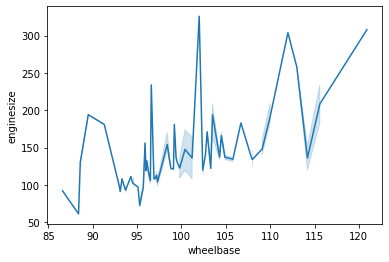

In [32]:
## line chart
sns.lineplot(data=carPriceData, x="wheelbase", y="enginesize")

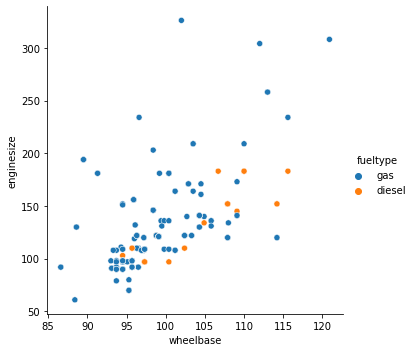

In [33]:
## scatter plot
sns.relplot(data=carPriceData, x='wheelbase', y='enginesize',
hue='fueltype')

<AxesSubplot:xlabel='wheelbase', ylabel='carbody'>

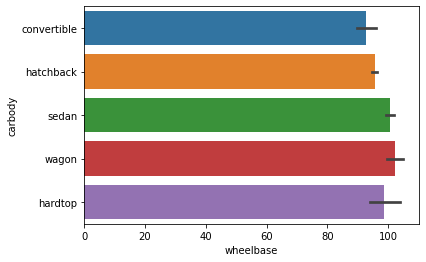

In [34]:
## bar chart
sns.barplot(x="wheelbase", y="carbody", data=carPriceData)

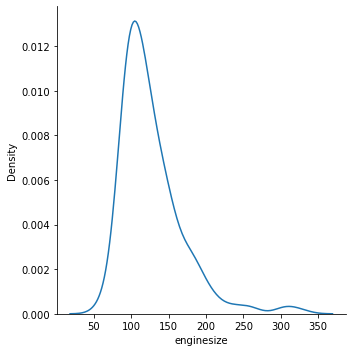

In [35]:
## Density plot
sns.displot(data=carPriceData, x='enginesize', kind='kde')

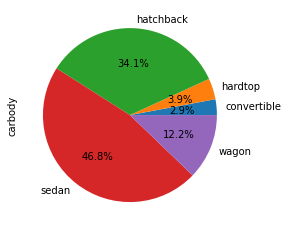

In [36]:
## pie chart
data = carPriceData.groupby("carbody")["carbody"].count()
data.plot.pie(autopct="%.1f%%");
